## Taken from Alan Chau

In [27]:
import numpy as np
import matplotlib.pylab as plt
import minepy as mpy
import math
from sklearn import preprocessing

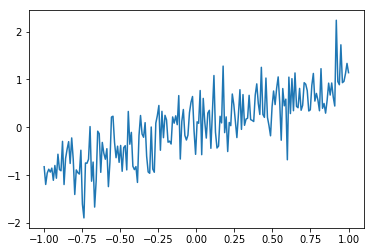

In [28]:
# Linear relationship
x = np.linspace(-1, 1, 200)
y1 = x + 0.5 * np.random.normal(0, 1, 200)

plt.plot(x, y1)
plt.show()

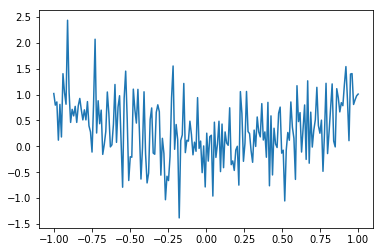

In [29]:
# Quadratic relationship
y2 = x ** 2 + 0.5 * np.random.normal(0, 1, 200)
plt.plot(x, y2)
plt.show()

In [30]:
# MIC for linear with noise level 0.5
mine = mpy.MINE(alpha=0.5, est="mic_approx")
mine.compute_score(x, y1)
print("MIC for linear data: %.3f" % mine.mic())

# MIC for quadratic with noise level 0.5
mine2 = mpy.MINE(alpha=0.5, est="mic_approx")
mine2.compute_score(x, y2)
print("MIC for Quadratic data %.3f" % mine2.mic())

# MIC for 0 noise level
y15 = x
min3 = mpy.MINE(alpha=0.5, est="mic_approx")
min3.compute_score(x, y15)
print("0 noise level: %.2f" %min3.mic())

# MIC for complete randomm level
y3 = np.random.uniform(0, 1, 200)
mine4 = mpy.MINE(alpha=0.5, est="mic_approx")
mine4.compute_score(x, y3)
print("Complete random noise: %.3f" % mine4.mic())

MIC for linear data: 0.584
MIC for Quadratic data 0.234
0 noise level: 1.00
Complete random noise: 0.138


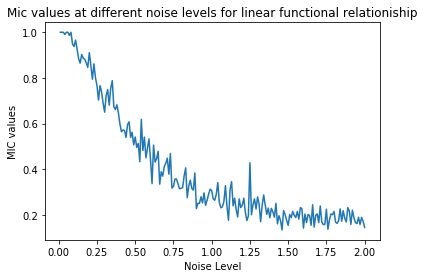

In [32]:
def noise_vs_mic(noise_range):
    mic_vec = []
    for noise in noise_range:
        x = np.linspace(-1,1,200)
        y = x + noise * np.random.normal(size=200)
        mine = mpy.MINE(alpha=0.5, est="mic_approx")
        mine.compute_score(x, y)
        mic_vec.append(mine.mic())
    return mic_vec

noise_range = [(i + 1) * 0.01 for i in range(200)]

# Plot MIC at different levels with linear functional
plt.plot(noise_range,noise_vs_mic(noise_range))
plt.xlabel("Noise Level")
plt.ylabel("MIC values")
plt.title("Mic values at different noise levels for linear functional relationiship")
plt.show()


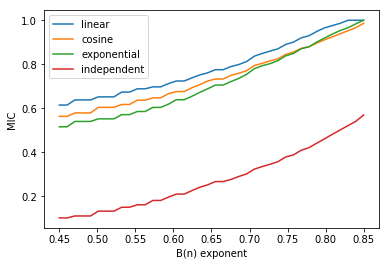

In [33]:
x = np.random.uniform(-1, 1, 200)
y1= preprocessing.scale(x) + 0.7 * np.random.normal(0,1,size=200)
y2= preprocessing.scale(np.cos(x)) + 0.7 * np.random.normal(0,1,size=200)
y3= preprocessing.scale(np.exp(x)) + 0.7 * np.random.normal(0,1,size=200)
y4= 0.7 * np.random.normal(0,1,size=200)
b_vec= np.linspace(0.45,0.85,40)
def b_sensitivity(b_vec, x, y):
    mic_vec = []
    for b in b_vec:
        mine = mpy.MINE(alpha=b, est="mic_approx")
        mine.compute_score(x,y)
        mic_vec.append(mine.mic())
    return mic_vec

plt.plot(b_vec,b_sensitivity(b_vec,x,y1),label='linear')
plt.plot(b_vec,b_sensitivity(b_vec,x,y2),label='cosine')
plt.plot(b_vec,b_sensitivity(b_vec,x,y3),label='exponential')
plt.plot(b_vec,b_sensitivity(b_vec,x,y4),label='independent')
plt.legend()
plt.xlabel('B(n) exponent')
plt.ylabel('MIC')
plt.savefig('b_n_effect.png')

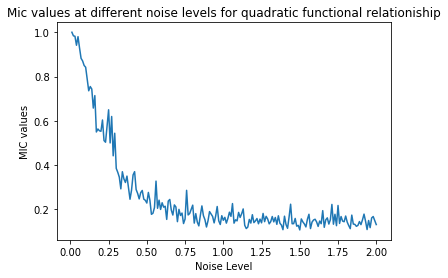

In [34]:
def noise_vs_mic_quadratic(noise_range):
    mic_vec = []
    for noise in noise_range:
        x = np.linspace(-1, 1, 200)
        y = x ** 2 + noise * np.random.normal(size=200)
        mine = mpy.MINE(alpha=0.5, est="mic_approx")
        mine.compute_score(x, y)
        mic_vec.append(mine.mic())
    return mic_vec

# For quadratic
noise_range = [(i + 1) * 0.01 for i in range(200)]
plt.plot(noise_range,noise_vs_mic_quadratic(noise_range))
plt.xlabel("Noise Level")
plt.ylabel("MIC values")
plt.title("Mic values at different noise levels for quadratic functional relationiship")
plt.show()

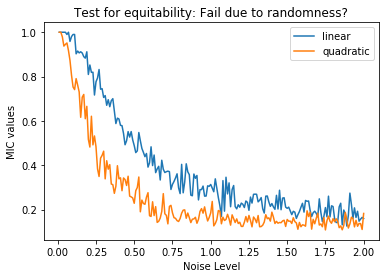

In [35]:
# For both
plt.plot(noise_range,noise_vs_mic(noise_range), label="linear")
plt.plot(noise_range,noise_vs_mic_quadratic(noise_range), label="quadratic")
plt.title("Test for equitability: Fail due to randomness?")
plt.xlabel("Noise Level")
plt.ylabel("MIC values")
plt.legend()
plt.show()
# Conclusion, not equitable, even for linear noise.
# Wait, is it just due to randomness within noise?
# If they have exactly the same noise?


In [40]:
def noise_vs_mic_pairwise(noise_range):
    mic_vec_lin, mic_vec_quad, mic_vec_exp, mic_vec_sin = [], [], [], []
    for noise in noise_range:
        x = np.random.uniform(-np.pi, np.pi, 500)
        error = noise * np.random.normal(size=500)
        y_linear = preprocessing.scale(x) + error
        y_quad = preprocessing.scale(x ** 2) + error
        y_exp = preprocessing.scale(np.exp(x)) + error
        y_sin = preprocessing.scale(np.sin(x)) + error
        mine = mpy.MINE(alpha=0.5, est="mic_approx")
        # For linear
        mine.compute_score(x, y_linear)
        mic_vec_lin.append(mine.mic())
        # For Quadratic
        mine.compute_score(x, y_quad)
        mic_vec_quad.append(mine.mic())
        # For exp
        mine.compute_score(x, y_exp)
        mic_vec_exp.append(mine.mic())
        # For sin
        mine.compute_score(x, y_sin)
        mic_vec_sin.append(mine.mic())

    return mic_vec_lin, mic_vec_quad, mic_vec_exp, mic_vec_sin

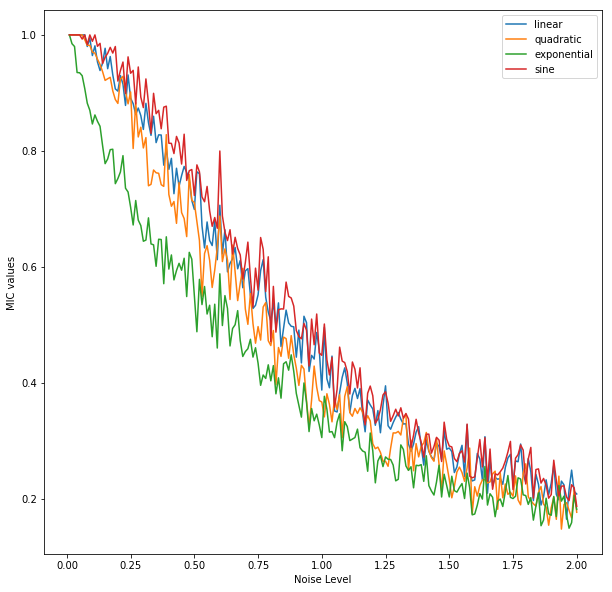

In [44]:
# Testing
mic_vec_lin, mic_vec_quad, mic_vec_exp, mic_vec_sin = noise_vs_mic_pairwise(noise_range)
plt.figure(figsize=[10,10])
plt.plot(noise_range, mic_vec_lin, label="linear")
plt.plot(noise_range, mic_vec_quad, label="quadratic")
plt.plot(noise_range, mic_vec_exp, label="exponential")
plt.plot(noise_range, mic_vec_sin, label="sine")
plt.xlabel("Noise Level")
plt.ylabel("MIC values")
plt.legend()
plt.savefig('Test_for_equitability.png')

In [ ]:
# Shall we play around with exponential noise?
def noise_vs_mic_pairwise(noise_range):
    mic_vec_lin = []
    mic_vec_quad = []
    mic_vec_exp = []
    mic_vec_sin = []
    for noise in noise_range:
        x = np.linspace(-np.pi, np.pi, 500)
        error = noise * np.random.exponential(size=500)
        y_linear = x + error
        y_quad = x ** 2 + error
        y_exp = np.exp(x) + error
        y_sin = np.sin(x) + error
        mine = mpy.MINE(alpha=0.5, est="mic_approx")
        # For linear
        mine.compute_score(x, y_linear)
        mic_vec_lin.append(mine.mic())
        # For Quadratic
        mine.compute_score(x, y_quad)
        mic_vec_quad.append(mine.mic())
        # For exp
        mine.compute_score(x, y_exp)
        mic_vec_exp.append(mine.mic())
        # For sin
        mine.compute_score(x, y_sin)
        mic_vec_sin.append(mine.mic())

    return mic_vec_lin, mic_vec_quad, mic_vec_exp, mic_vec_sin


In [ ]:
# Testing
mic_vec_lin, mic_vec_quad, mic_vec_exp, mic_vec_sin = noise_vs_mic_pairwise(noise_range)
plt.figure(figsize=[10,10])
plt.plot(noise_range, mic_vec_lin, label="linear")
plt.plot(noise_range, mic_vec_quad, label="quadratic")
plt.plot(noise_range, mic_vec_exp, label="Exponential")
plt.plot(noise_range, mic_vec_sin, label="Sine")
plt.title("Test for equitability for Exponential noise")
plt.xlabel("Noise Level")
plt.ylabel("MIC values")
plt.legend()
plt.show()

In [ ]:
# Shall we play around with exponential noise?
def noise_vs_mic_pairwise(noise_range):
    mic_vec_lin = []
    mic_vec_quad = []
    mic_vec_exp = []
    mic_vec_sin = []
    for noise in noise_range:
        x = np.linspace(0, 10, 500)
        error = noise * np.random.exponential(size=500)
        y_linear = x + error
        y_quad = x ** 2 + error
        y_exp = np.exp(x) + error
        y_sin = np.sin(x) + error
        mine = mpy.MINE(alpha=0.5, est="mic_approx")
        # For linear
        mine.compute_score(x, y_linear)
        mic_vec_lin.append(mine.mic())
        # For Quadratic
        mine.compute_score(x, y_quad)
        mic_vec_quad.append(mine.mic())
        # For exp
        mine.compute_score(x, y_exp)
        mic_vec_exp.append(mine.mic())
        # For sin
        mine.compute_score(x, y_sin)
        mic_vec_sin.append(mine.mic())

    return mic_vec_lin, mic_vec_quad, mic_vec_exp, mic_vec_sin


In [ ]:
# Testing
mic_vec_lin, mic_vec_quad, mic_vec_exp, mic_vec_sin = noise_vs_mic_pairwise(noise_range)
plt.figure(figsize=[10,10])
plt.plot(noise_range, mic_vec_lin, label="linear")
plt.plot(noise_range, mic_vec_quad, label="quadratic")
plt.plot(noise_range, mic_vec_exp, label="Exponential")
plt.plot(noise_range, mic_vec_sin, label="Sine")
plt.title("Test for equitability for Exponential noise")
plt.xlabel("Noise Level")
plt.ylabel("MIC values")
plt.legend()
plt.show()


In [ ]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def compare_AB_AC(noise_lvl_ab, noise_lvl_ac, noise = "Gaussian"):

    a = np.linspace(-5, 5, 800)
    if noise == "Gaussian":
        error = np.random.normal(loc=0.0,scale=1, size=800)
    elif noise == "Exponential":
        error = np.random.exponential(size=800)
    else:
        raise ValueError("Wrong distribution")

    b = np.sin(a) + noise_lvl_ab * error
    c = 2 * np.array([sigmoid(i) for i in a]) - 1 + noise_lvl_ac * error

    f, ax = plt.subplots(1, 3, sharey=True, figsize=(15,5))

    ax[0].plot(a, b)
    ax[0].set_title("A--B")
    ax[1].plot(a, c)
    ax[1].set_title("A--C")
    ax[2].plot(a, b, label="A--B")
    ax[2].plot(a, c, label="A--C")
    ax[2].set_title("AB vs AC (%s Noise)" %noise)
    ax[2].legend()

    plt.show()

    mine = mpy.MINE(alpha=0.5, est="mic_approx")
    # For a, b
    mine.compute_score(a, b)
    print("MIC for A--B: %.3f" %mine.mic())

    # For a, c
    mine.compute_score(a, c)
    print("MIC for A--C: %.3f" %mine.mic())

    if noise_lvl_ab > noise_lvl_ac:
        print("MIC for A--B should be less than A--C")
    elif noise_lvl_ab < noise_lvl_ac:
        print("MIC for A--C should be less than A--B")
    else:
        print("MIC should not defer too much")

compare_AB_AC(3.5, 2, noise = "Gaussian")

compare_AB_AC(2,2, noise="Gaussian")

compare_AB_AC(2,2, noise="Exponential")

compare_AB_AC(0.5,0.5, noise="Exponential")

compare_AB_AC(5,2, noise="Exponential")

compare_AB_AC(2,4, noise="Exponential")
# Now this is dodgy....
compare_AB_AC(2,4, noise="Gaussian")



compare_AB_AC(0.5,0.5, noise="Gaussian")

compare_AB_AC(0.5,0.5, noise="Exponential")

compare_AB_AC(2,4, noise="Gaussian")